In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing our cleaned and Merged Data
merged_data = pd.read_csv('Merged_data.csv')

merged_data = merged_data.dropna() # Drops NaN Values which might affect liner regression

In [30]:
# Step 1 - Define Features and Target

# Target Variable
y = merged_data['Total_DC_Power']

# Select Important features
X = merged_data[[
    'AMBIENT_TEMPERATURE',
    'MODULE_TEMPERATURE',
    'IRRADIATION',
    'dc_power_roll_avg',
    'irradiation_roll_avg',
    'Hour' # Time-based features...You select to do your training on any feature e.g. Hour, Day, Month, Day_Of_Week
]]

In [31]:
# Step 2 : Train - Test Split
# Scikit-learn is a popular library for machine learning in Python
from sklearn.model_selection import train_test_split

# We are splitting the data into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
# Step 3 Train a Baseline Model (Linear Regression)
from sklearn.linear_model import LinearRegression

model = LinearRegression() # We can use several models here.
model.fit(X_train, y_train) # Train the model using the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Step 4 : Evaluate Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #common metrics for regression tasks
import numpy as np

y_pred = model.predict(X_test) #making predctions on unseen data (X_test)

# Comparing the predicted values with actual values
# Comparing the predicted values with actual values
mae = mean_absolute_error(y_test,y_pred) # Gives absolute difference between predicted and actual values
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Measures Predictions Error - Values Predicted vs Actual
r2 = r2_score(y_test, y_pred) # R² score - How well the model explains the variance in the data. Close to 1 is good.

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 3300.56
RMSE: 6416.89
R²: 0.99


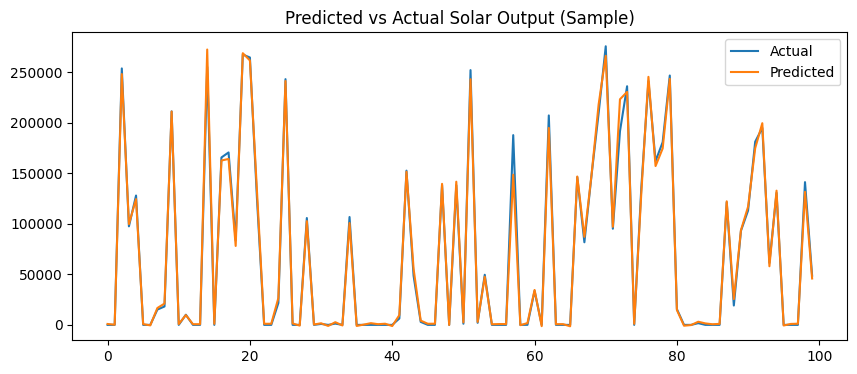

In [34]:
#Step 5 : Plotting Predictions vs Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Predicted vs Actual Solar Output (Sample)')
plt.show()

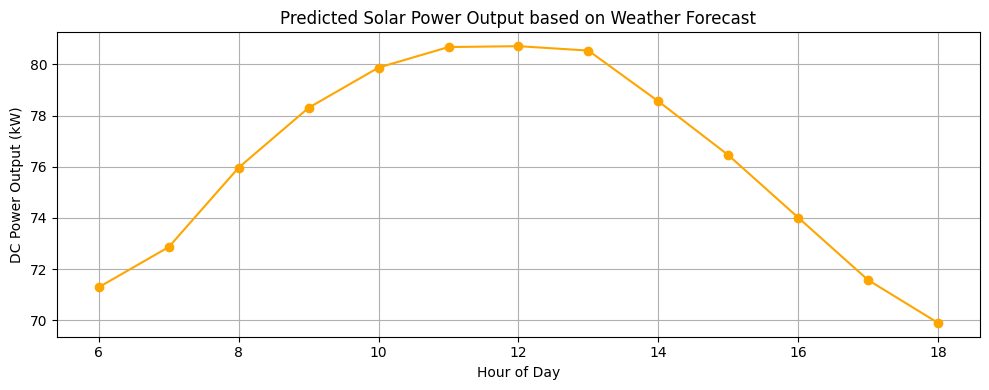

In [ ]:
#Prediction for Future Input.

# Simulated weather forecast for 6 AM to 6 PM (13 hours)
hours = list(range(6, 19))  # 6AM to 6PM
ambient =     [22, 24, 26, 28, 30, 32, 34, 33, 31, 28, 26, 24, 22]
irradiance =  [100, 250, 500, 700, 850, 950, 1000, 970, 800, 600, 400, 200, 50] #irradiance in W/m²

irradiance_kw = [i / 1000 for i in irradiance]  # Convert to Kw/m²

future_inputs = pd.DataFrame({
    'AMBIENT_TEMPERATURE': ambient,
    'MODULE_TEMPERATURE': [t + 6 for t in ambient],
    'IRRADIATION': irradiance_kw, 
    'dc_power_roll_avg': 68712, # Average of dc power rolling average from the training data
    'irradiation_roll_avg': irradiance_kw, # More or less similar to irradiation
    'Hour': hours
})

# Predict DC power in watts
# Using the trained model to predict future inputs
future_predictions = model.predict(future_inputs)

# Convert to kW and add column on the future inputs DataFrame
future_inputs['Predicted_DC_Power_kW'] = future_predictions / 1000

# Display the prediction table
# print("\nPredicted Solar Power Output (kW):")
# print(future_inputs[['Hour', 'Predicted_DC_Power_kW']])

# Plot
plt.figure(figsize=(10, 4))
plt.plot(future_inputs['Hour'], future_inputs['Predicted_DC_Power_kW'], marker='o', color='orange')
plt.title("Predicted Solar Power Output based on Weather Forecast")
plt.xlabel("Hour of Day")
plt.ylabel("DC Power Output (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# To be used on Streamlit App
import joblib

# Save the model
joblib.dump(model, 'solar_model.pkl')

['solar_model.pkl']